![](https://raw.githubusercontent.com/ConnorMurphyCode/FlightPricePrediction/main/images/Title.jpg)

In [ ]:
import pandas
import seaborn
import matplotlib.pyplot
import numpy
import ipywidgets as widgets
from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
flightHistory = pandas.read_csv('https://raw.githubusercontent.com/ConnorMurphyCode/FlightPricePrediction/main/inputData/Clean_Dataset.csv')
flightHistory.head(100)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,seatType,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Vistara,UK-737,Delhi,Afternoon,one,Night,Mumbai,Economy,7.58,1,17610
96,96,Air_India,AI-762,Delhi,Night,one,Night,Mumbai,Economy,23.83,1,17295
97,97,Vistara,UK-673,Delhi,Afternoon,one,Evening,Mumbai,Economy,5.00,1,17663
98,98,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Economy,26.50,1,18030


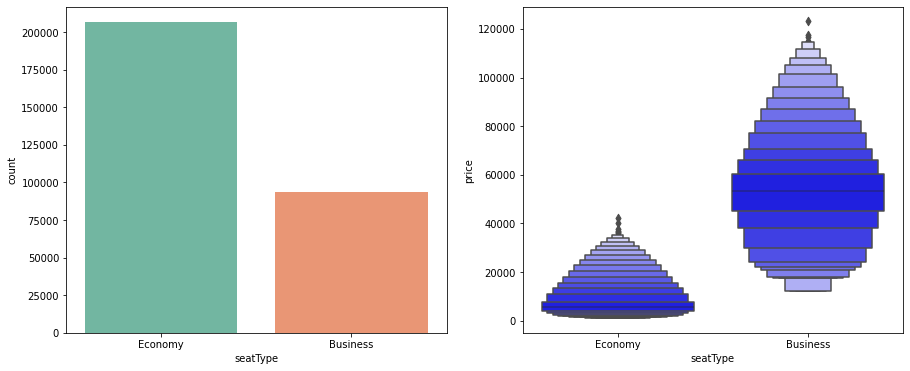

In [ ]:
#Sets color themes and figure sizes for the graphs
seaborn.set_palette("Set2")
matplotlib.pyplot.figure(figsize = (15, 6))


#Number of economy and business tickets in the dataset
matplotlib.pyplot.subplot(1,2,1) #Allows me to plot things next to each other
seaborn.countplot(x = "seatType", data = flightHistory)


#Price distribution of Economy vs Business seats
matplotlib.pyplot.subplot(1,2,2) #Allows me to plot things next to each other
seaborn.boxenplot(x = "seatType", y = "price", color="b", scale="linear", data = flightHistory)

![](https://raw.githubusercontent.com/ConnorMurphyCode/FlightPricePrediction/main/images/ClassComparison.jpg)

Text(0.5, 1.0, 'Airline Company VS price')

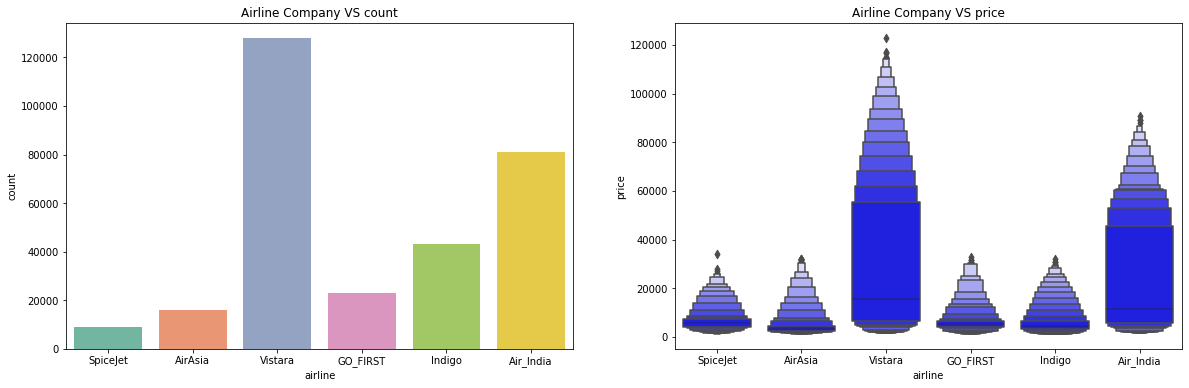

In [ ]:
#Size of the graphs
matplotlib.pyplot.figure(figsize = (20, 6))


#Airline count graphing
matplotlib.pyplot.subplot(1,2,1)
seaborn.countplot(x = "airline", data = flightHistory)
matplotlib.pyplot.title("Airline Company VS count")

#Airliine Vs Price graphing
matplotlib.pyplot.subplot(1,2,2)
seaborn.boxenplot(x = "airline", y = "price", color="b", scale = "linear", data = flightHistory)
matplotlib.pyplot.title("Airline Company VS price")

![](https://raw.githubusercontent.com/ConnorMurphyCode/FlightPricePrediction/main/images/airline_distribution.jpg)

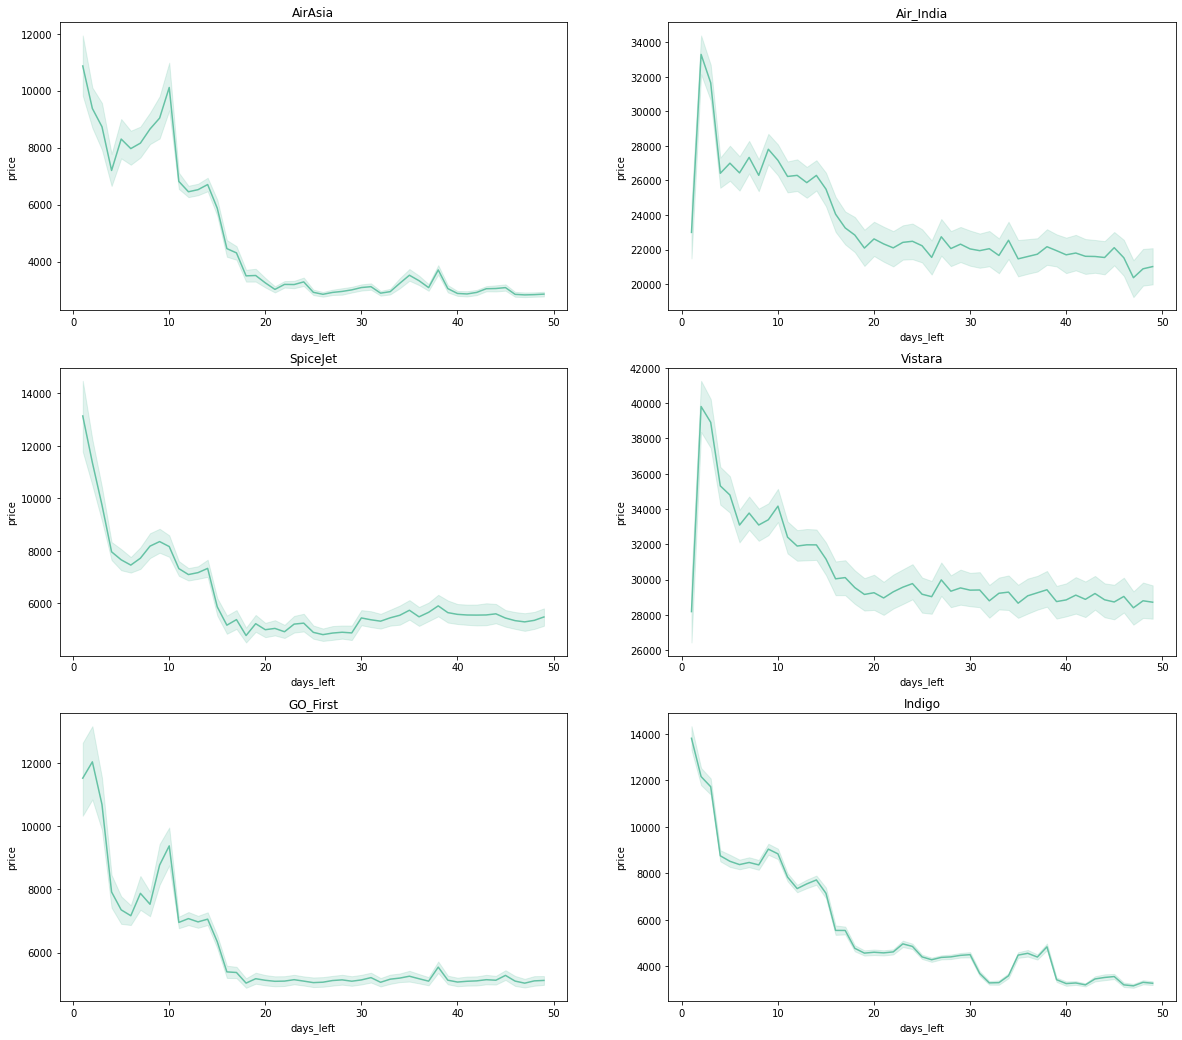

In [ ]:
#Graph sizing
matplotlib.pyplot.figure(figsize = (20, 18))

#Grapging for price vs days left for each airline
matplotlib.pyplot.subplot(3,2,1)
airAsiaData = flightHistory.query('airline == "AirAsia"')
matplotlib.pyplot.title("AirAsia")
seaborn.lineplot(data = airAsiaData, x = 'days_left', y = 'price')


matplotlib.pyplot.subplot(3,2,2)
airIndiaData = flightHistory.query('airline == "Air_India"')
matplotlib.pyplot.title("Air_India")
seaborn.lineplot(data = airIndiaData, x = 'days_left', y = 'price')


matplotlib.pyplot.subplot(3,2,3)
SpiceJetData = flightHistory.query('airline == "SpiceJet"')
matplotlib.pyplot.title("SpiceJet")
seaborn.lineplot(data = SpiceJetData, x = 'days_left', y = 'price')


matplotlib.pyplot.subplot(3,2,4)
VistaraData = flightHistory.query('airline == "Vistara"')
matplotlib.pyplot.title("Vistara")
seaborn.lineplot(data = VistaraData, x = 'days_left', y = 'price')


matplotlib.pyplot.subplot(3,2,5)
GO_FirstData = flightHistory.query('airline == "GO_FIRST"')
matplotlib.pyplot.title("GO_First")
seaborn.lineplot(data = GO_FirstData, x = 'days_left', y = 'price')


matplotlib.pyplot.subplot(3,2,6)
IndigoData = flightHistory.query('airline == "Indigo"')
matplotlib.pyplot.title("Indigo")
seaborn.lineplot(data = IndigoData, x = 'days_left', y = 'price')

![](https://raw.githubusercontent.com/ConnorMurphyCode/FlightPricePrediction/main/images/daysleft_vs_price.jpg)

In [ ]:
#modifying categorical variables to be read as quantitative
airlineDummy = pandas.get_dummies(flightHistory.airline)
sourceCityDummy = pandas.get_dummies(flightHistory.source_city)
departureTimeDummy = pandas.get_dummies(flightHistory.departure_time)
stopsDummy = pandas.get_dummies(flightHistory.stops)
arrivalTimeDummy = pandas.get_dummies(flightHistory.arrival_time)
destinationCityDummy = pandas.get_dummies(flightHistory.destination_city)
seatTypeDummy = pandas.get_dummies(flightHistory.seatType)


#Combining the dummy data and the numerical data into the X variable
xCompiled = pandas.concat([airlineDummy, sourceCityDummy, departureTimeDummy, stopsDummy, arrivalTimeDummy, destinationCityDummy, seatTypeDummy, flightHistory.duration, flightHistory.days_left], axis = ('columns'))
yCompiled = flightHistory.price


#removes index column as to not affect the model results
xCompiled.reset_index()

xCompiled

,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Bangalore,Chennai,Delhi,Hyderabad,...,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Business,Economy,duration,days_left
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,2.17,1
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,2.33,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,2.17,1
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,2.25,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,10.08,49
300149,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,10.42,49
300150,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,13.83,49
300151,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,10.00,49


In [ ]:
#Seperating the data into a training set and a test set

x_train, x_test, y_train, y_test = train_test_split(xCompiled, yCompiled, test_size = 0.4, random_state = 0)

#training the model
model = LinearRegression()
model.fit(x_train, y_train)


#predicting the results
y_predict = model.predict(x_test)

#evaluate the model. this number is how accurate the model is
r2_score(y_test, y_predict)

0.9117095947118492

![](https://raw.githubusercontent.com/ConnorMurphyCode/FlightPricePrediction/main/images/prediction_accuracy.jpg)

In [ ]:
#Dropdown widgets
#The value next to each option represents its position in the prediction string
airlineWidget = widgets.Dropdown(
    options=[('AirAsia',  0), ('Air India', 1), ('GO FIRST', 2), ('Indigo', 3), ('SpiceJet', 4), ('Vistara', 5)],
    description='Airline:')

sCityWidget = widgets.Dropdown(
    options=[('Bangalore',  6), ('Chennai', 7), ('Delhi', 8), ('Hyderabad', 9), ('Kolkata', 10), ('Mumbai', 11)],
    description='Source City:')

dCityWidget = widgets.Dropdown(
    options=[('Bangalore',  27), ('Chennai', 28), ('Delhi', 29), ('Hyderabad', 30), ('Kolkata', 31), ('Mumbai', 32)],
    description='Destination:')

departureTimeWidget = widgets.Dropdown(
    options=[('Early Morning',  13), ('Morning', 16), ('Evening', 14), ('Afternoon', 12), ('Night', 17), ('Late Night', 15)],
    description='Departure:')

arrivalTimeWidget = widgets.Dropdown(
    options=[('Early Morning',  22), ('Morning', 25), ('Evening', 23), ('Afternoon', 21), ('Night', 26), ('Late Night', 24)],
    description='Arrival:')

stopsWidget = widgets.Dropdown(
    options=[('one',  18), ('two', 19), ('two or more', 20)],
    description='# of stops:')

seatTypeWidget = widgets.Dropdown(
    options=[('Economy',  34), ('Business', 33)],
    description='Seat Type:')


#Float sliders widgets
durationWidget = widgets.FloatSlider(min = 1, max = 28, step = 0.1, 
    description = 'Duration (hrs)', layout = widgets.Layout(width = '700px'))

daysLeftWidget = widgets.IntSlider(min = 1, max = 30, step = 1, 
    description = 'Days left', layout = widgets.Layout(width = '700px'))


#Display
display(airlineWidget)
display(sCityWidget)
display(dCityWidget)
display(departureTimeWidget)
display(arrivalTimeWidget)
display(stopsWidget)
display(seatTypeWidget)
display(durationWidget)
display(daysLeftWidget)


#Button Widget
button = widgets.Button(description = "Calculate Flight Price", layout = widgets.Layout(width = '300px'))
output = widgets.Output()

display(button, output)

def button_pressed(b):
    with output:
        #Compiling choices
        flightChoices = [0] * 37
        flightChoices[airlineWidget.value] = 1
        flightChoices[sCityWidget.value] = 1
        flightChoices[dCityWidget.value] = 1
        flightChoices[departureTimeWidget.value] = 1
        flightChoices[arrivalTimeWidget.value] = 1
        flightChoices[stopsWidget.value] = 1
        flightChoices[seatTypeWidget.value] = 1
        flightChoices[35] = durationWidget.value
        flightChoices[36] = daysLeftWidget.value
        
        #Clears output between button presses
        clear_output()

        compiledChoices = [[]]
        compiledChoices[0] = flightChoices
        print("The predicted cost of this flight is: ₹", int(model.predict(compiledChoices)),  "Indian Rupees\n\n\n")

button.on_click(button_pressed)

Dropdown(description='Airline:', options=(('AirAsia', 0), ('Air India', 1), ('GO FIRST', 2), ('Indigo', 3), ('…

Dropdown(description='Source City:', options=(('Bangalore', 6), ('Chennai', 7), ('Delhi', 8), ('Hyderabad', 9)…

Dropdown(description='Destination:', options=(('Bangalore', 27), ('Chennai', 28), ('Delhi', 29), ('Hyderabad',…

Dropdown(description='Departure:', options=(('Early Morning', 13), ('Morning', 16), ('Evening', 14), ('Afterno…

Dropdown(description='Arrival:', options=(('Early Morning', 22), ('Morning', 25), ('Evening', 23), ('Afternoon…

Dropdown(description='# of stops:', options=(('one', 18), ('two', 19), ('two or more', 20)), value=18)

Dropdown(description='Seat Type:', options=(('Economy', 34), ('Business', 33)), value=34)

FloatSlider(value=1.0, description='Duration (hrs)', layout=Layout(width='700px'), max=28.0, min=1.0)

IntSlider(value=1, description='Days left', layout=Layout(width='700px'), max=30, min=1)

Button(description='Calculate Flight Price', layout=Layout(width='300px'), style=ButtonStyle())

Output()